In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd

In [4]:
from citybikeUtil import CB201808, CB201809, CB201810, CB201811, CB201812, CB201901
from predictor import LSTMPredictor, DecisionTreePredictor, XGBoostPredictor

Using TensorFlow backend.


LSTM

In [5]:
lstm_predictor = LSTMPredictor()
lstm_predictor.train_month = CB201808

In [6]:
train_x, train_y = lstm_predictor.get_train_vec(CB201808)
test_x, test_y = lstm_predictor.get_train_vec(CB201809)
lstm_predictor.train_model(train_x, train_y)
predict_y = lstm_predictor.model.predict(test_x)

./201808-citibike-tripdata.csv.lstm.h5


In [7]:
date_index = pd.date_range(start='2018-09-01 13:00:00', periods=707, freq='H')
merge_data = {
    'predict': predict_y.flatten(),
    'real': test_y.flatten()
}
lstm_df = pd.DataFrame(merge_data, index=date_index)

In [8]:
sns.set(style="whitegrid")
sns.set_context(rc={"lines.linewidth": 2})

Xgboost

In [9]:
xgb = XGBoostPredictor()

In [10]:
test_x, test_y = xgb.get_train_vec([CB201809])
train_x, train_y = xgb.get_train_vec([CB201808])

100%|██████████| 1/1 [00:18<00:00, 18.18s/it]


In [11]:
predictor = xgb.train_model(train_x, train_y, [(test_x, test_y)])

[0]	validation_0-rmse:0.263512
Will train until validation_0-rmse hasn't improved in 50 rounds.
[1]	validation_0-rmse:0.240711
[2]	validation_0-rmse:0.220523
[3]	validation_0-rmse:0.202444
[4]	validation_0-rmse:0.186717
[5]	validation_0-rmse:0.172708
[6]	validation_0-rmse:0.16048
[7]	validation_0-rmse:0.149846
[8]	validation_0-rmse:0.140159
[9]	validation_0-rmse:0.131806
[10]	validation_0-rmse:0.124643
[11]	validation_0-rmse:0.118455
[12]	validation_0-rmse:0.11346
[13]	validation_0-rmse:0.108845
[14]	validation_0-rmse:0.105029
[15]	validation_0-rmse:0.101197
[16]	validation_0-rmse:0.098491
[17]	validation_0-rmse:0.096129
[18]	validation_0-rmse:0.09427
[19]	validation_0-rmse:0.092114
[20]	validation_0-rmse:0.090746
[21]	validation_0-rmse:0.089222
[22]	validation_0-rmse:0.088902
[23]	validation_0-rmse:0.088161
[24]	validation_0-rmse:0.087272
[25]	validation_0-rmse:0.0867
[26]	validation_0-rmse:0.085939
[27]	validation_0-rmse:0.085535
[28]	validation_0-rmse:0.085779
[29]	validation_0-rmse

In [12]:
predict_y = predictor.predict(test_x)

In [13]:
date_index = pd.date_range(start='2018-09-01 00:00:00', periods=len(test_y), freq='H')
merge_data = {
    'predict': predict_y.tolist(),
    'real':  test_y['res'].tolist()
}
xgb_df = pd.DataFrame(merge_data, index=date_index)

merge

In [14]:
sns.set(style="whitegrid")
sns.set_context(rc={"lines.linewidth": 2})

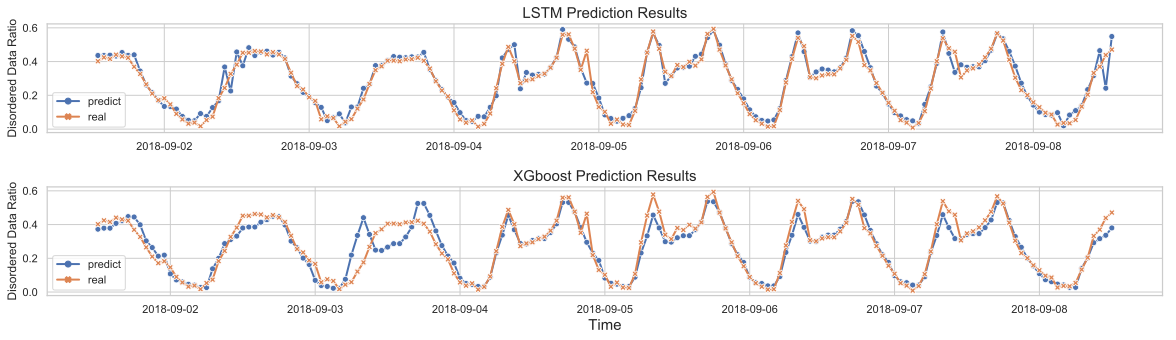

In [19]:
# plt.figure(figsize=(15, 5))
f, ax = plt.subplots(2,1,figsize = (20, 5))
# 设置图名称
ax[0].set_title('LSTM Prediction Results', fontsize=15)
# 设置X轴 Y轴 的label
# ax[0].set_xlabel('Time',fontsize=10)
ax[0].set_ylabel('Disordered Data Ratio',fontsize=12)
sns.lineplot(size='event',
             markers=True,dashes=False,
             data=lstm_df[:169],
             ax=ax[0])
ax[1].set_title('XGboost Prediction Results', fontsize=15)
ax[1].set_xlabel('Time',fontsize=15)
ax[1].set_ylabel('Disordered Data Ratio',fontsize=12)
sns.lineplot(size='event',
             markers=True,dashes=False,
             data=xgb_df[12:181],
            ax=ax[1])
plt.subplots_adjust(hspace=0.5)
plt.savefig('forcast-bike.pdf',bbox_inches='tight',format='pdf')